### It contains data about all the main features that contribute to the price of a car. So let’s start this task by importing the necessary Python libraries and the dataset:

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import warnings
warnings.filterwarnings('ignore')

In [25]:
data = pd.read_csv("carvana.csv")
data.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    22000 non-null  object
 1   Year    22000 non-null  int64 
 2   Miles   22000 non-null  int64 
 3   Price   22000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 687.6+ KB


In [27]:
data.shape

(22000, 4)

In [28]:
data.isnull().sum()

Name     0
Year     0
Miles    0
Price    0
dtype: int64

In [29]:
data.describe()

,Year,Miles,Price
count,2.200000e+04,22000.000000,22000.000000
mean,1.946648e+05,54445.697318,20707.285136
std,1.630370e+06,25685.933926,6535.580304
min,2.009000e+03,53.000000,10990.000000
25%,2.014000e+03,35512.000000,16590.000000
50%,2.017000e+03,51890.000000,19590.000000
75%,2.020000e+03,73191.000000,22990.000000
max,2.022350e+07,120167.000000,102990.000000


In [30]:
data['Name'].unique()

array([' Chevrolet Trax', ' GMC Terrain', ' Jeep Wrangler',
       ' Jeep Renegade', ' BMW X', ' Buick Encore', ' Jeep Compass',
       ' Jeep Patriot', ' Chrysler Sebring', ' Subaru Legacy',
       ' Subaru XV Crosstrek', ' Mitsubishi Eclipse Cross',
       ' Toyota Corolla', ' Nissan Pathfinder', ' Lincoln MKC',
       ' Lexus ES', ' Dodge Grand Caravan Passenger', ' Ford Escape',
       ' Mitsubishi Mirage G', ' Toyota C-HR', ' Toyota Yaris',
       ' MAZDA CX-', ' Nissan Rogue Sport', ' Volkswagen Atlas',
       ' MAZDA MAZDA', ' Nissan Sentra', ' Honda Civic', ' Nissan Rogue',
       ' Toyota Corolla iM', ' Subaru Forester', ' Volkswagen Jetta',
       ' FIAT ', ' Honda Accord', ' Hyundai Sonata', ' GMC Acadia',
       ' Kia Optima', ' Hyundai Veloster', ' Hyundai Elantra',
       ' FIAT  Spider', ' Honda Odyssey', ' Volkswagen Tiguan',
       ' Acura RDX', ' Jeep Grand Cherokee', ' Chrysler Voyager',
       ' Hyundai Accent', ' Honda CR-V', ' INFINITI QX',
       ' Chevrolet Trav

#### The price column in this dataset is supposed to be the column whose values we need to predict. So let’s see the distribution of the values of the price column

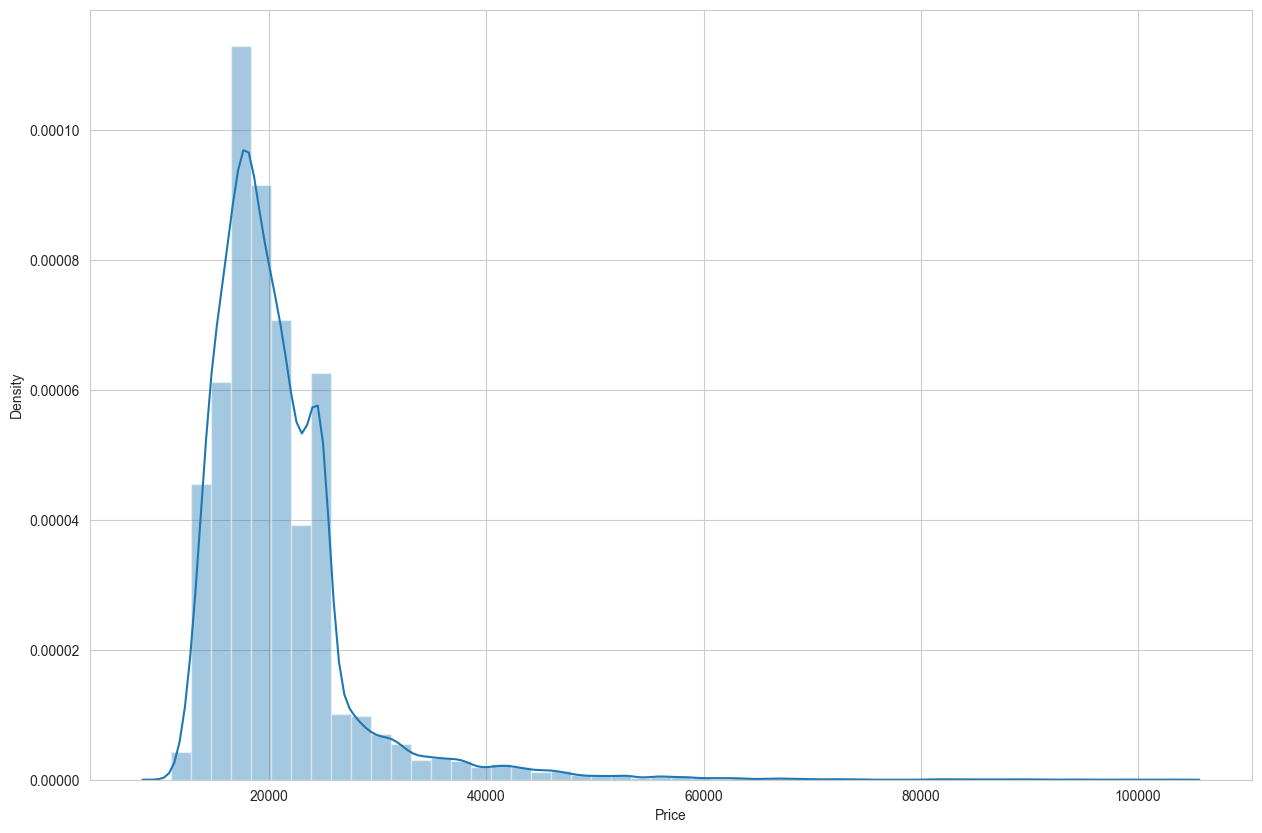

In [31]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 10))
sns.distplot(data.Price)
plt.show()

### Now let’s have a look at the correlation among all the features of this dataset:

In [34]:
data.corr()

,Year,Miles,Price
Year,1.000000,-0.028941,0.141570
Miles,-0.028941,1.000000,-0.474124
Price,0.141570,-0.474124,1.000000


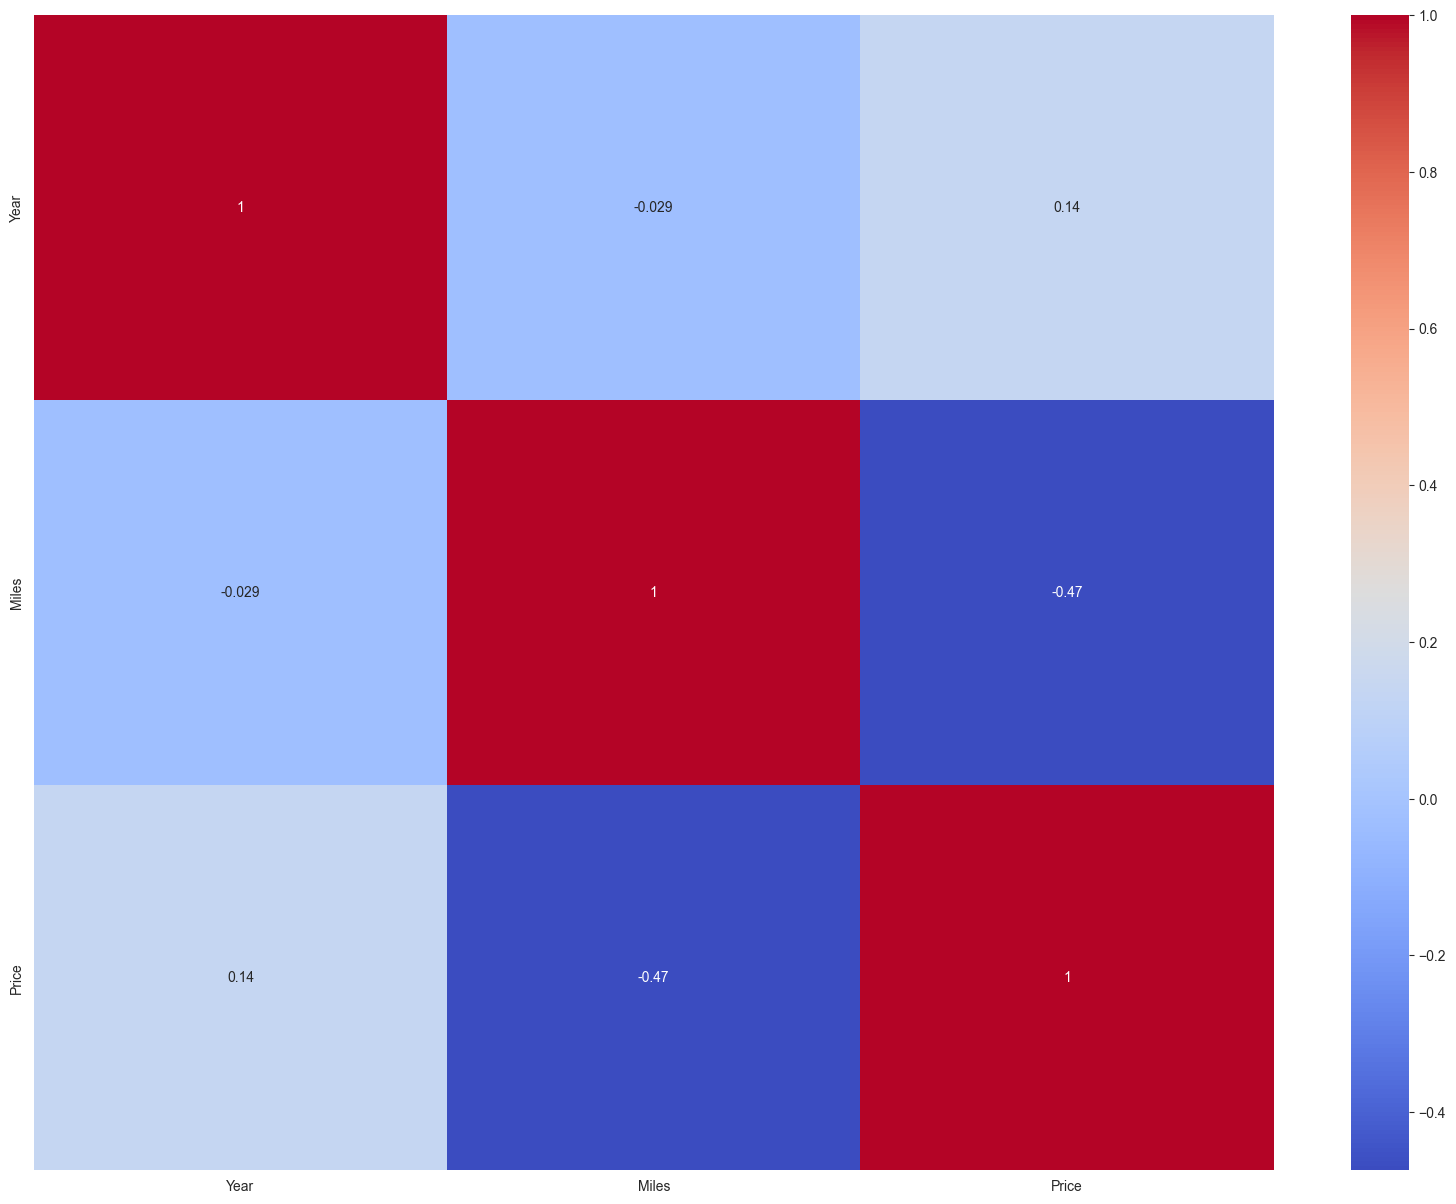

In [35]:
plt.figure(figsize=(20, 15))
correlations = data.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.show()

#### I will use the decision tree regression algorithm to train a car price prediction model. So let’s split the data into training and test sets and use the decision tree regression algorithm to train the model:



In [39]:
x=data[['Year','Miles']]
y=data['Price']

In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2,random_state=3)

In [43]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

In [44]:
from sklearn.metrics import mean_absolute_error
model.score(xtest, predictions)

1.0

### The model gives 100% accuracy on the test set, which is excellent.